
# <center> **Análisis y seguimiento de delitos cometidos en Bucaramanga.** </center>


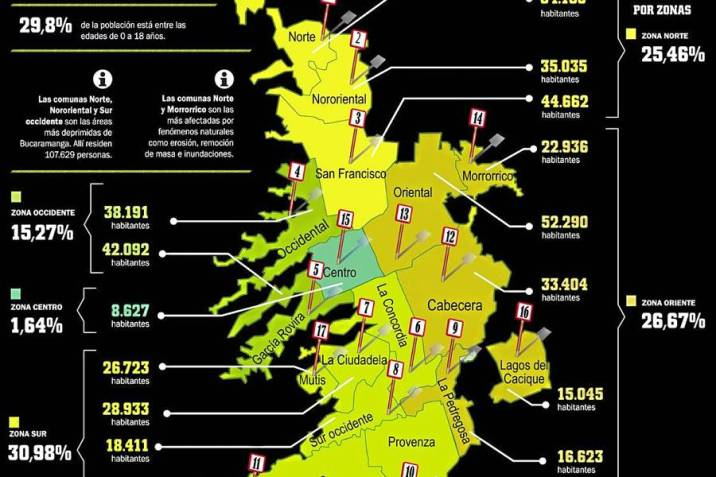

In [39]:
from IPython.display import Image
Image("/content/drive/MyDrive/Temporal/comunas.jpg", width=1080, height=600)


In [8]:
#@title **Acceso al drive**
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Temporal')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Temporal


In [9]:
#@title **Librerias**
from sklearn.datasets import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import collections
import operator
from collections import Counter
from sklearn.cluster import KMeans 

In [10]:
#@title **Cargue del dataset**
os.chdir('/content/drive/My Drive/Temporal')
print(os.getcwd())
d =  pd.read_csv("Copia Delitos_en_Bucaramanga.csv")
print("\nTipo de dato d:", type(d))
print("columns and shape", d.columns, d.shape)
print("---------------- \n Display data \n----------------")
d.head(10)

/content/drive/My Drive/Temporal

Tipo de dato d: <class 'pandas.core.frame.DataFrame'>
columns and shape Index(['ORDEN', 'ARMAS_MEDIOS', 'BARRIOS_HECHO', 'LATITUD', 'LONGITUD', 'ZONA',
       'NOM_COMUNA', 'ANO', 'MES', 'DIA', 'DIA_SEMANA', 'DESCRIPCION_CONDUCTA',
       'CONDUCTA', 'CLASIFICACIONES DELITO', 'EDAD', 'CURSO_DE_VIDA',
       'ESTADO_CIVIL_PERSONA', 'GENERO', 'MOVIL_AGRESOR', 'MOVIL_VICTIMA'],
      dtype='object') (129768, 20)
---------------- 
 Display data 
----------------


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ORDEN,ARMAS_MEDIOS,BARRIOS_HECHO,LATITUD,LONGITUD,ZONA,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,1,ARMA BLANCA / CORTOPUNZANTE,BUENOS AIRES,7.17056,-73.1351,URBANA,14. Morrorico,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,30,05. Adultez,UNION LIBRE,MASCULINO,A PIE,A PIE
1,2,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,7.12065,-73.1261,URBANA,05. García Rovira,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,21,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE
2,3,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,7.12065,-73.1261,URBANA,05. García Rovira,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,23,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE
3,4,ARMA BLANCA / CORTOPUNZANTE,COMUNEROS,7.15136,-73.1457,URBANA,03. San Francisco,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,36,05. Adultez,CASADO,MASCULINO,A PIE,A PIE
4,5,ARMA BLANCA / CORTOPUNZANTE,GIRARDOT,7.17056,-73.1351,URBANA,04. Occidental,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,20,04. Jovenes,UNION LIBRE,MASCULINO,A PIE,A PIE
5,6,ARMA BLANCA / CORTOPUNZANTE,GIRARDOT,7.17056,-73.1351,URBANA,04. Occidental,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,20,04. Jovenes,UNION LIBRE,MASCULINO,A PIE,A PIE
6,7,ARMA BLANCA / CORTOPUNZANTE,LOS ANGELES,7.18746,-73.1317,URBANA,02. Nor Oriental,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,28,04. Jovenes,CASADO,MASCULINO,A PIE,A PIE
7,8,ARMA BLANCA / CORTOPUNZANTE,NARIÑO,7.15655,-73.1408,URBANA,04. Occidental,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,42,05. Adultez,SOLTERO,MASCULINO,A PIE,A PIE
8,9,ARMA BLANCA / CORTOPUNZANTE,PROVENZA,7.12,-73.1161,URBANA,10. Provenza,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,22,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE
9,10,ARMA BLANCA / CORTOPUNZANTE,SOTOMAYOR,7.16131,-73.14,URBANA,12. Cabecera del Llano,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,20,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE


In [11]:
#@title **Corrección de datos, estableciendo un estandar.**

#Corrección de datos
d=d.rename(columns={'CLASIFICACIONES DELITO':'CLASIFICACIONES_DELITO'})
d.loc[d.DIA_SEMANA=='01. lunes','DIA_SEMANA']='01. Lunes'
d.loc[d.DIA_SEMANA=='02. martes','DIA_SEMANA']='02. Martes'
d.loc[d.DIA_SEMANA=='03. miércoles','DIA_SEMANA']='03. Miércoles'
d.loc[d.DIA_SEMANA=='04. jueves','DIA_SEMANA']='04. Jueves'
d.loc[d.DIA_SEMANA=='05. viernes','DIA_SEMANA']='05. Viernes'
d.loc[d.DIA_SEMANA=='06. sábado','DIA_SEMANA']='06. Sábado'
d.loc[d.NOM_COMUNA=='01. norte','NOM_COMUNA']='01. Norte'
d.loc[d.EDAD=='NO REPORTA','EDAD']='0'
d.loc[d.EDAD=='No reporta','EDAD']='0'
d.loc[d.EDAD=='No Reporta','EDAD']='0'
d.loc[d.EDAD=='-','EDAD']='0'
d.loc[d.ARMAS_MEDIOS=='-','ARMAS_MEDIOS']='No Reporta'
d.loc[d.ARMAS_MEDIOS=='NO REPORTADO','ARMAS_MEDIOS']='No Reporta'
d.loc[d.NOM_COMUNA=='corregimiento 1', 'NOM_COMUNA']='Corregimiento 1'
d.loc[d.NOM_COMUNA=='corregimiento 2', 'NOM_COMUNA']='Corregimiento 2'
d.loc[d.NOM_COMUNA=='corregimiento 3', 'NOM_COMUNA']='Corregimiento 3'
d.loc[d.NOM_COMUNA=='sin informacion', 'NOM_COMUNA']='Sin informacion'
d.loc[d.CONDUCTA=='-','CONDUCTA']='No Reporta'
d.loc[d.CONDUCTA=='<','CONDUCTA']='No Reporta'
d.loc[d.CONDUCTA=='No Reporta','CONDUCTA']='No Reporta'
d = d[d['CONDUCTA'].notna()]
d.loc[d.CURSO_DE_VIDA=='No Reporta','CURSO_DE_VIDA']='No Reporta'
d.loc[d.CURSO_DE_VIDA=='00. NO REPORTA','CURSO_DE_VIDA']='No Reporta'
d.loc[d.CURSO_DE_VIDA=='01. Primera Infancia','CURSO_DE_VIDA']='01. Primera infancia'
d.loc[d.CURSO_DE_VIDA=='05. adultez','CURSO_DE_VIDA']='05. Adultez'
d.loc[d.CURSO_DE_VIDA=='06. Persona Mayor','CURSO_DE_VIDA']='06. Persona mayor'

#Convertir el tipo de dato de la columna edad de string a double
d['EDAD']=pd.to_numeric(d['EDAD'])

In [12]:
#@title **Eliminación de datos que no se van a usar**
indexNames = d[ d['NOM_COMUNA'] == 'Corregimiento 1' ].index
d.drop(indexNames , inplace=True)
indexNames = d[ d['NOM_COMUNA'] == 'Corregimiento 2' ].index
d.drop(indexNames , inplace=True)
indexNames = d[ d['NOM_COMUNA'] == 'Corregimiento 3' ].index
d.drop(indexNames , inplace=True)
indexNames = d[ d['NOM_COMUNA'] == 'Sin informacion' ].index
d.drop(indexNames , inplace=True)


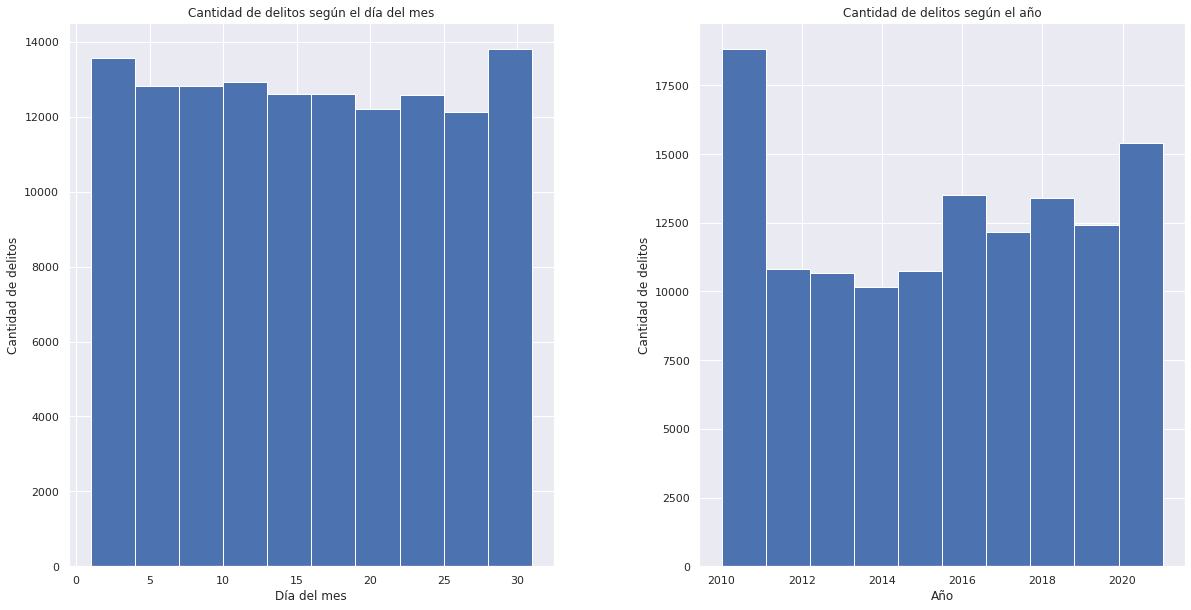

In [13]:
#@title **Primera información**

plt.figure(figsize = (20, 10))
ax = plt.subplot(1,2,1)
d.hist('DIA', ax=ax);
plt.title("Cantidad de delitos según el día del mes")
plt.xlabel("Día del mes")
plt.ylabel("Cantidad de delitos")

ax = plt.subplot(1,2,2)
d.hist('ANO', ax=ax);
plt.title("Cantidad de delitos según el año")
plt.xlabel("Año")
plt.ylabel("Cantidad de delitos")



plt.show()

In [14]:
#Ranking cantidad de delitos por comunas
dictComunas=collections.Counter(d['NOM_COMUNA'])
rankingComunas = sorted(dictComunas.items(), key=operator.itemgetter(1), reverse=True)
print("\nVector Ranking de delitos por comuna:",rankingComunas)


Vector Ranking de delitos por comuna: [('03. San Francisco', 15219), ('15. Centro', 13222), ('13. Oriental', 12864), ('12. Cabecera del Llano', 12215), ('01. Norte', 12193), ('06. La Concordia', 9561), ('05. García Rovira', 8696), ('04. Occidental', 7430), ('10. Provenza', 6316), ('09. La Pedregosa', 4868), ('02. Nor Oriental', 4494), ('11. Sur', 4339), ('17. Mutis', 4063), ('08. Sur Occidente', 3307), ('14. Morrorico', 3152), ('07. La Ciudadela', 3092), ('16. Lagos del Cacique', 3077)]


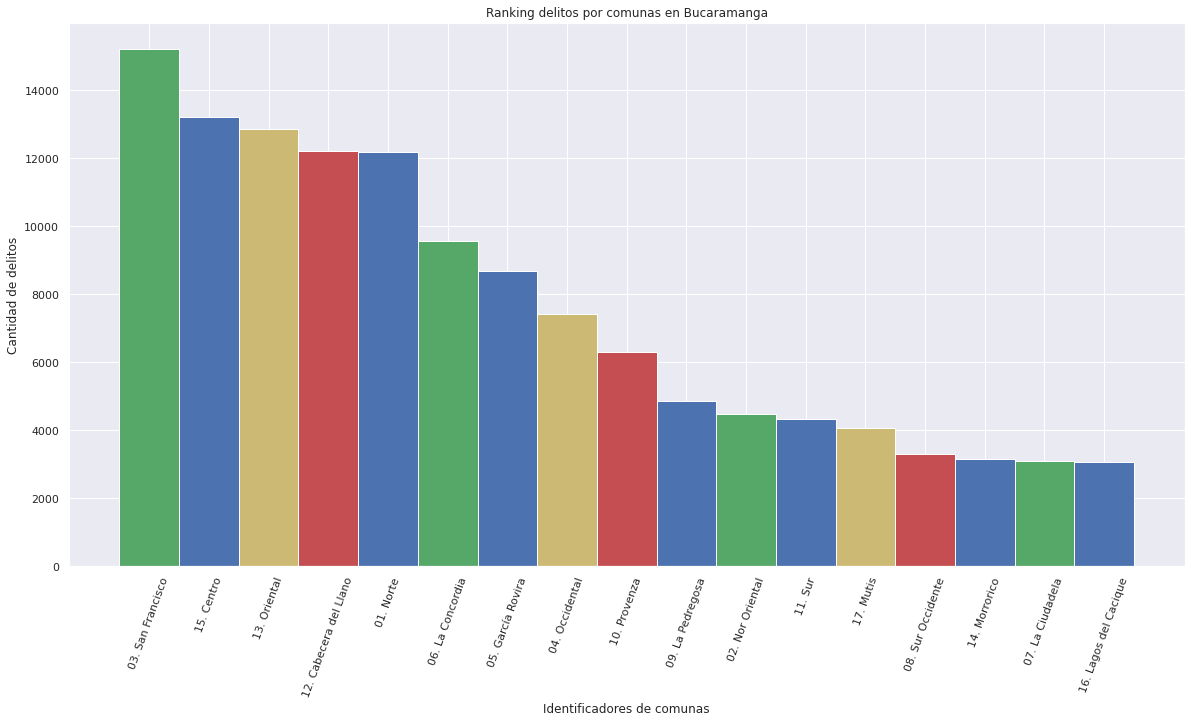

In [15]:
#Grafico Ranking cantidad de delitos por comunas
x, y = zip(*rankingComunas) 
myColors=['g','b','y','r','b','g','b','y','r','b','g','b','y','r','b','g','b','y','r','b','g']
plt.figure(figsize=(20,10))
plt.bar(x, y, width=1, color=myColors)
plt.xticks(rotation=70)
plt.title('Ranking delitos por comunas en Bucaramanga')
plt.xlabel('Identificadores de comunas')
plt.ylabel('Cantidad de delitos')
plt.show()

In [16]:
#@title **Adición de la característica de población por comuna al dataset**
nom_comuna=pd.unique(d['NOM_COMUNA'])
nom_comuna=sorted(nom_comuna)
pob_comuna = [54183, 35035, 44662, 38191, 42092, 28143 , 28933, 18411, 16623, 32299, 28459, 33404, 52290, 22936, 8627, 15045, 26723 ]

d['POB_COMUNA']=np.nan
for i in range(len(pob_comuna)):
  d.loc[d.NOM_COMUNA==nom_comuna[i],'POB_COMUNA']=pob_comuna[i]

In [17]:
x, y = zip(*rankingComunas) 
n_delitos=[]
nom_com=[]
for i in range(len(x)):
  n_delitos.append(y[i])
  nom_com.append(x[i])
d_comunas=pd.DataFrame({'NOM_COMUNAS':nom_com, 'N_DELITOS':n_delitos,'POB_COMUNAS':pob_comuna})

In [18]:
#Tasa de delito por comuna
tasa=(d_comunas['N_DELITOS']/d_comunas['POB_COMUNAS'])*100
d_comunas=d_comunas.assign(TASA_DELITOS=tasa)
d_comunas = d_comunas.sort_values('TASA_DELITOS', ascending=False)
d_comunas.head(17)

,NOM_COMUNAS,N_DELITOS,POB_COMUNAS,TASA_DELITOS
7,04. Occidental,7430,18411,40.356309
8,10. Provenza,6316,16623,37.995548
1,15. Centro,13222,35035,37.739403
14,14. Morrorico,3152,8627,36.536455
5,06. La Concordia,9561,28143,33.972924
3,12. Cabecera del Llano,12215,38191,31.983975
6,05. García Rovira,8696,28933,30.055646
4,01. Norte,12193,42092,28.967500
2,13. Oriental,12864,44662,28.803009
0,03. San Francisco,15219,54183,28.088146


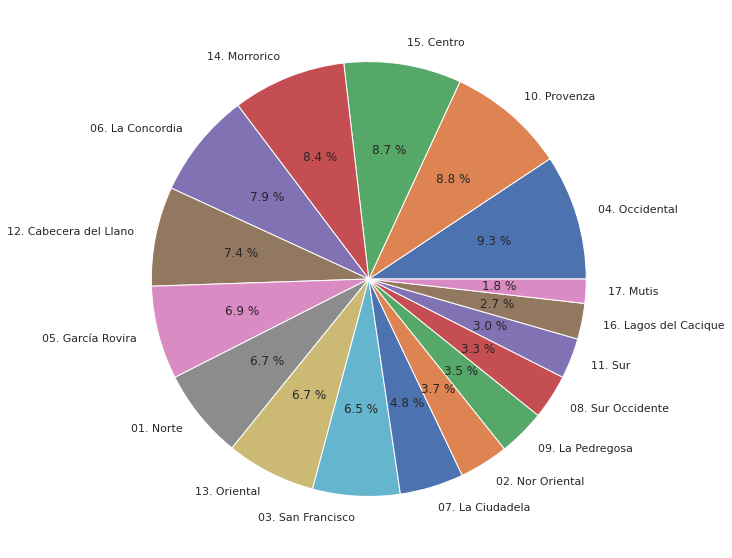

In [30]:

plt.figure(figsize=(20,10))
plt.pie(d_comunas['TASA_DELITOS'], labels=d_comunas['NOM_COMUNAS'], autopct="%0.1f %%")
plt.show()

In [ ]:
#Obtenemos cada arma y creamos su respectivo diccionario
armas_medios=pd.unique(d['ARMAS_MEDIOS'])
armas_medios=sorted(armas_medios)
dic_armas_medios={}
for i in range(len(armas_medios)):
  dic_armas_medios[armas_medios[i]]=i
print("\nArmas por individual:",dic_armas_medios)

#Obtenemos cada barrio y creamos su respectivo diccionario
barrios_hecho=pd.unique(d['BARRIOS_HECHO'])
barrios_hecho=sorted(barrios_hecho)
dic_barrios_hecho={}
for i in range(len(barrios_hecho)):
  dic_barrios_hecho[barrios_hecho[i]]=i+1
print("\nBarrios por individual:",dic_barrios_hecho)

#Obtenemos cada dia de la semana y creamos su respectivo diccionario
dia_semana=pd.unique(d['DIA_SEMANA'])
dia_semana=sorted(dia_semana)
dic_dia_semana={}
for i in range(len(dia_semana)):
  dic_dia_semana[dia_semana[i]]=i+1
print("\nDia semana por individual:",dic_dia_semana)

#Obtenemos cada comuna y creamos su respectivo diccionario

dic_nom_comuna={}
for i in range(len(nom_comuna)):
  dic_nom_comuna[nom_comuna[i]]=i+1
print("\nComunas por individual:",dic_nom_comuna)

#Obtenemos cada conducta o definicion del delito y creamos su respectivo diccionario
conducta=pd.unique(d['CONDUCTA'])
conducta=sorted(conducta)
dic_conducta={}
for i in range(len(conducta)):
  dic_conducta[conducta[i]]=i+1
print("\nConductas por individual:",dic_conducta)

#Obtenemos cada clasificacion de delito y creamos su respectivo diccionario
clasificaciones_delito=pd.unique(d['CLASIFICACIONES_DELITO'])
clasificaciones_delito=sorted(clasificaciones_delito)
dic_clasificaciones_delito={}
for i in range(len(clasificaciones_delito)):
  dic_clasificaciones_delito[clasificaciones_delito[i]]=i+1
print("\nClasificaciones de delitos por individual:",dic_clasificaciones_delito)

#Obtenemos cada curso de vida y creamos su respectivo diccionario
curso_de_vida=pd.unique(d['CURSO_DE_VIDA'])
curso_de_vida=sorted(curso_de_vida)
dic_curso_de_vida={}
for i in range(len(curso_de_vida)):
  dic_curso_de_vida[curso_de_vida[i]]=i
print("\nCursos de vida por individual:",dic_curso_de_vida)

#Obtenemos cada movil del agresor y creamos su respectivo diccionario
movil_agresor=pd.unique(d['MOVIL_AGRESOR'])
movil_agresor=sorted(movil_agresor)
dic_movil_agresor={}
for i in range(len(movil_agresor)):
  dic_movil_agresor[movil_agresor[i]]=i+1
print("\nMovil del agresor por individual:",dic_movil_agresor)

#Obtenemos cada movil de la victima y creamos su respectivo diccionario
movil_victima=pd.unique(d['MOVIL_VICTIMA'])
movil_victima=sorted(movil_victima)
dic_movil_victima={}
for i in range(len(movil_victima)):
  dic_movil_victima[movil_victima[i]]=i+1
print("\nMovil de la victima por individual:",dic_movil_victima)

#Numerando los nombres de cada comuna y otras caractristicas

for i in range(len(armas_medios)):
  d.loc[d.ARMAS_MEDIOS==armas_medios[i],'ARMAS_MEDIOS']=i

for i in range(len(barrios_hecho)):
  d.loc[d.BARRIOS_HECHO==barrios_hecho[i],'BARRIOS_HECHO']=i+1

for i in range(len(dia_semana)):
  d.loc[d.DIA_SEMANA==dia_semana[i],'DIA_SEMANA']=i+1

for i in range(len(nom_comuna)):
  d.loc[d.NOM_COMUNA==nom_comuna[i],'NOM_COMUNA']=i+1

for i in range(len(conducta)):
  d.loc[d.CONDUCTA==conducta[i],'CONDUCTA']=i

for i in range(len(clasificaciones_delito)):
  d.loc[d.CLASIFICACIONES_DELITO==clasificaciones_delito[i],'CLASIFICACIONES_DELITO']=i

for i in range(len(movil_agresor)):
  d.loc[d.MOVIL_AGRESOR==movil_agresor[i],'MOVIL_AGRESOR']=i+1

for i in range(len(movil_victima)):
  d.loc[d.MOVIL_VICTIMA==movil_victima[i],'MOVIL_VICTIMA']=i+1



Armas por individual: {'ACIDO': 0, 'AGUA CALIENTE': 1, 'ARMA BLANCA / CORTOPUNZANTE': 2, 'ARMA DE FUEGO': 3, 'ARMA TRAUMATICA': 4, 'ARTEFACTO EXPLOSIVO/CARGA DINAMITA': 5, 'ARTEFACTO INCENDIARIO': 6, 'BICICLETA': 7, 'BOLSA PLASTICA': 8, 'CARRO BOMBA': 9, 'CARTA EXTORSIVA': 10, 'CINTAS/CINTURON': 11, 'COMBUSTIBLE': 12, 'CONTUNDENTES': 13, 'CORTANTES': 14, 'CORTOPUNZANTES': 15, 'CUCHILLA': 16, 'CUERDA/SOGA/CADENA': 17, 'DIRECTA': 18, 'ESCOPOLAMINA': 19, 'GASES': 20, 'GRANADA DE MANO': 21, 'JERINGA': 22, 'LICOR ADULTERADO': 23, 'LLAMADA TELEFONICA': 24, 'LLAVE MAESTRA': 25, 'MEDICAMENTOS': 26, 'MIXTA': 27, 'MOTO': 28, 'No Reporta': 29, 'PALANCAS': 30, 'PAPA EXPLOSIVA': 31, 'PERRO': 32, 'POLVORA(FUEGOS PIROTECNICOS)': 33, 'PRENDAS DE VESTIR': 34, 'PUNZANTES': 35, 'QUIMICOS': 36, 'REDES SOCIALES': 37, 'SIN EMPLEO DE ARMAS': 38, 'SUSTANCIAS TOXICAS': 39, 'VEHICULO': 40, 'VENENO': 41}

Barrios por individual: {'12 DE OCTUBRE': 1, '13 DE JUNIO': 2, '20 DE JULIO': 3, '23 DE JUNIO': 4, '5 DE EN

(128108, 2)


Text(0, 0.5, 'CONDUCTA')

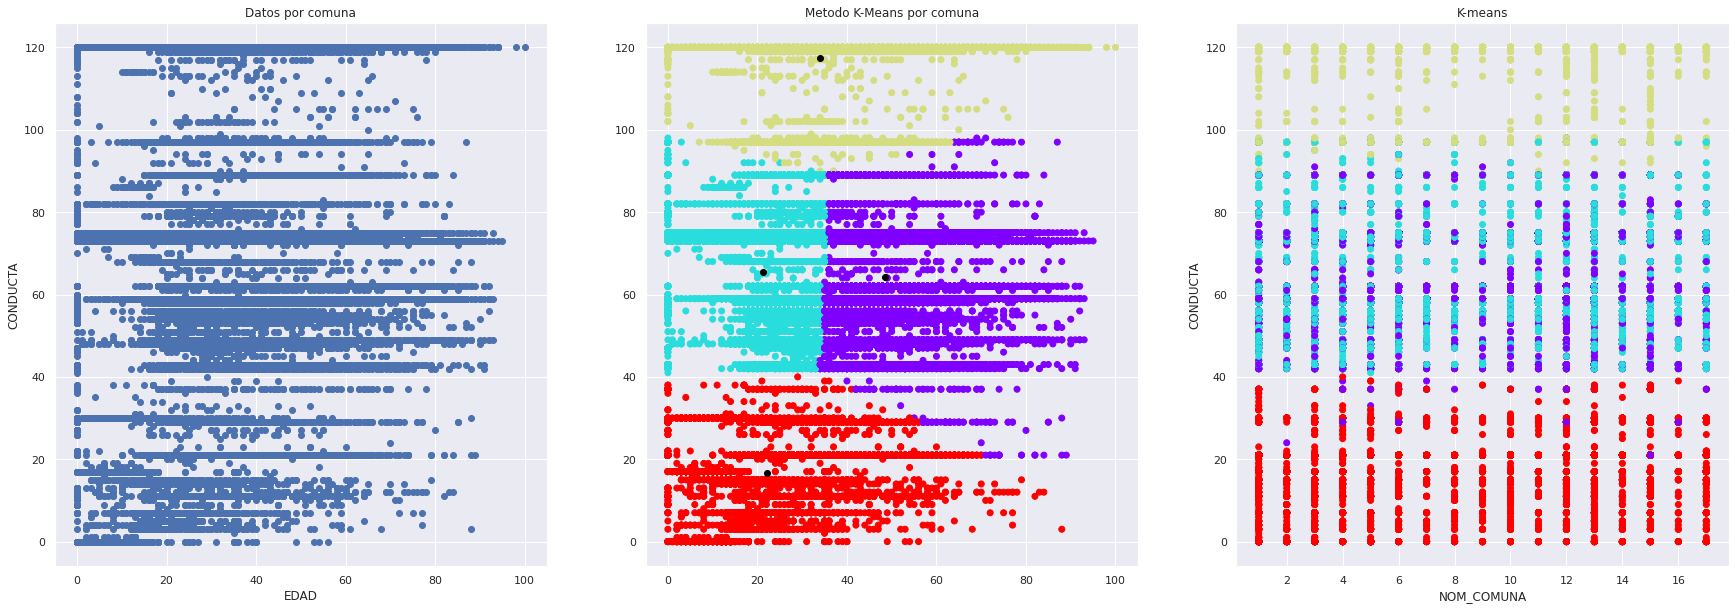

In [ ]:
data=d.loc[:,['EDAD','CONDUCTA']].values
print(data.shape)

kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

plt.figure(figsize=(30, 10))
plt.subplot(131)
plt.scatter(data[:,0], data[:,1], cmap='rainbow')
plt.title('Datos por comuna')
plt.xlabel('EDAD')
plt.ylabel('CONDUCTA')

plt.subplot(132)
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title('Metodo K-Means por comuna')
#plt.xlabel('Cantidad de delitos')
#plt.ylabel('Cantidad de habitantes')

plt.subplot(133)
plt.title("K-means")
plt.scatter(d['NOM_COMUNA'], d['CONDUCTA'], c=kmeans.labels_, cmap='rainbow') 
plt.xlabel('NOM_COMUNA')
plt.ylabel('CONDUCTA')

(39032, 2)


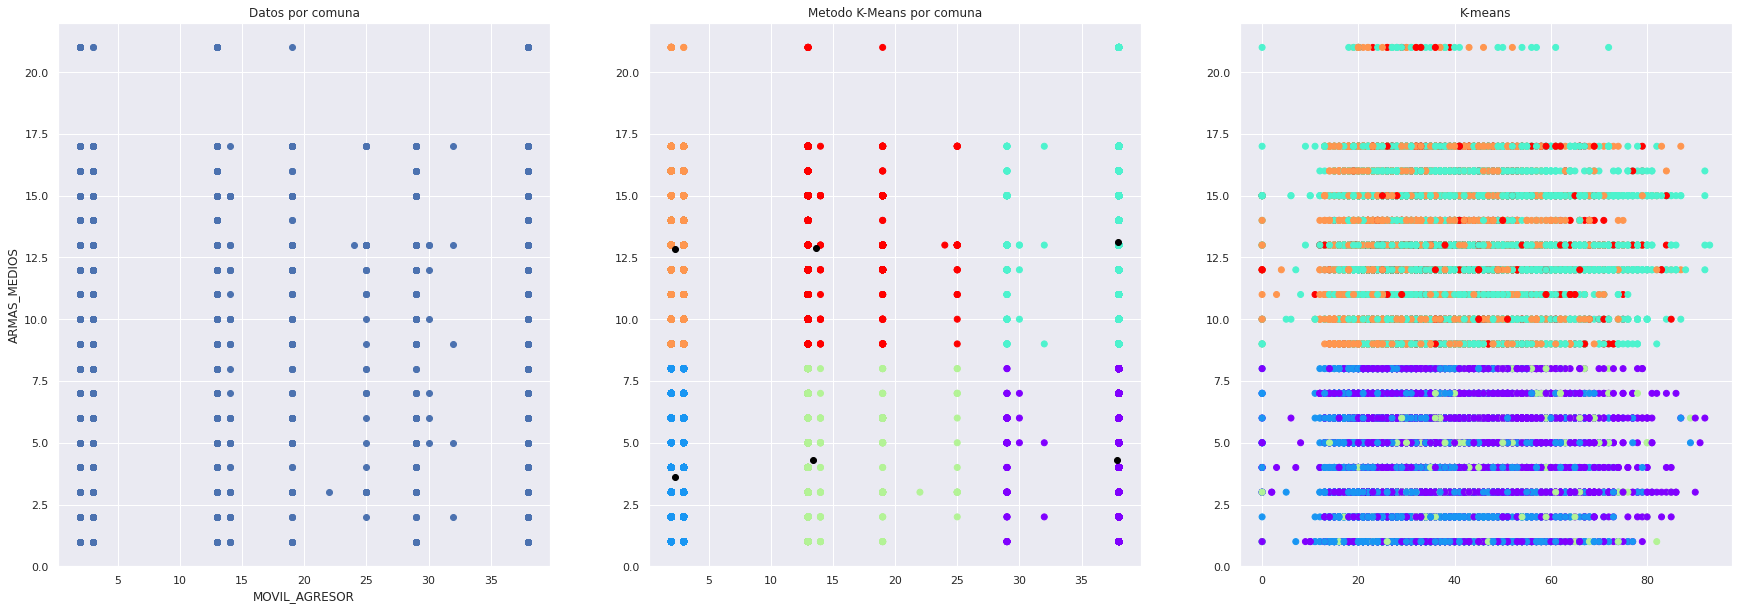

In [ ]:
data=d.loc[d.CONDUCTA==dic_conducta.get('HURTO A MOTOCICLETAS')][['ARMAS_MEDIOS','NOM_COMUNA']].values
print(data.shape)

kmeans = KMeans(n_clusters=6)
kmeans.fit(data)

plt.figure(figsize=(30, 10))
plt.subplot(131)
plt.scatter(data[:,0], data[:,1], cmap='rainbow')
plt.title('Datos por comuna')
plt.xlabel('ARMAS_MEDIOS')
plt.ylabel('NOM_COMUNA')

plt.subplot(132)
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title('Metodo K-Means por comuna')
#plt.xlabel('Cantidad de delitos')
#plt.ylabel('Cantidad de habitantes')

plt.subplot(133)
plt.title("K-means")
plt.scatter(d.loc[d.CONDUCTA==dic_conducta.get('HURTO A MOTOCICLETAS')][['EDAD']], d.loc[d.CONDUCTA==dic_conducta.get('HURTO A MOTOCICLETAS')][['NOM_COMUNA']], c=kmeans.labels_, cmap='rainbow') 


In [ ]:
#Porcentaje de delitos por comuna
def get_key(val):
    for key, value in dic_nom_comuna.items():
         if val == value:
             return key
p_c = np.empty(17)
for i in range(17):
  p_c[i]=np.mean(d['NOM_COMUNA']==(i+1))
  print("\nComuna ",get_key(i+1),":",p_c[i])


Comuna  01. Norte : 0.09517750647890842

Comuna  02. Nor Oriental : 0.0350797764386299

Comuna  03. San Francisco : 0.11879820151746963

Comuna  04. Occidental : 0.05799793923876729

Comuna  05. García Rovira : 0.0678802260592625

Comuna  06. La Concordia : 0.07463234146189153

Comuna  07. La Ciudadela : 0.02413588534673869

Comuna  08. Sur Occidente : 0.025814156805195616

Comuna  09. La Pedregosa : 0.03799918818496893

Comuna  10. Provenza : 0.04930215130983233

Comuna  11. Sur : 0.03386985980578887

Comuna  12. Cabecera del Llano : 0.09534923658163424

Comuna  13. Oriental : 0.10041527461204608

Comuna  14. Morrorico : 0.024604240172354575

Comuna  15. Centro : 0.10320979173822088

Comuna  16. Lagos del Cacique : 0.024018796640334718

Comuna  17. Mutis : 0.03171542760795579
